# **About Data:**
  1. Customer Id(Numerical): Unique Id of the customer.
  2. Gender(Categorical): Gender of the Customer.
  3. Age(Numerical): Age of the customer.
  4. Annual Income(Numerical): Annual Income of the customer in 1000$.
  5. Spending Score(Numerical) : spending score of the customer in between 1 to 100.

# **Objective:**
   **We need to form clusters of customers having same behaviour using Unsupervised algorithms.** 


In [ ]:
!pip install scikit-learn-extra

In [ ]:
#Importing the necessary libraries.
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn_extra.cluster import KMedoids
from math import floor
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wg
import seaborn as sns
from sklearn.utils import resample
from matplotlib import pyplot
import pickle
sns.set();


#Renaming the Column labels as there is space exists between them.
names = ['CustomerID', 'Gender', 'Age', 'Annual_Income_in_k$', 'Spending_score']
loc ='/content/drive/My Drive/Colab Notebooks/customer_segmentation/Mall_Customers.csv'
data = pd.read_csv(loc, header = 0, names = names)

wg.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
#Dropping the CustomerID column as it is a simply sequence number. 
data.drop('CustomerID', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               200 non-null    object
 1   Age                  200 non-null    int64 
 2   Annual_Income_in_k$  200 non-null    int64 
 3   Spending_score       200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
# Statistical description of the Numerical data. 
data.describe()

,Age,Annual_Income_in_k$,Spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
# Statistical description of the categorical data. 

data.describe(include='O')

,Gender
count,200
unique,2
top,Female
freq,112


### Observations:
1. Majority of the customer are female in category whose count is 112.
2. Age group is mostly Observed in between [28.75, 49.0].
3. Annual_Income is mostly Observed in between [41.5, 78.0].
4. Spending_Score is mostly observed in between [34.75, 73.0].

Female Percentage:  56.0
Male Percentage:  44.0


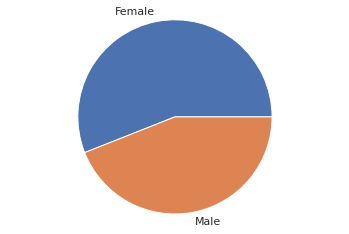

In [ ]:
#Gender percentage split

total = data['Gender'].value_counts()

female_percent = round((total[0]/ sum(total))*100, 2)
male_percent = total[1]/ sum(total)*100

print("Female Percentage: ",female_percent )
print("Male Percentage: ", male_percent)
plt.pie([female_percent, male_percent], labels= ['Female', 'Male'] )
plt.axis('equal')
plt.show()

In [ ]:
#checking for Duplicate observations.

if data.duplicated().sum() == 1:
  print('Duplicate Observations are present in the data.')
else:
  print("There are no Duplicate Observation within the data.")

There are no Duplicate Observation within the data.


In [ ]:
#Labelling the categorical feature (Gender)

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

data.head()
#Note 1 --> Male, 0 --> Female.

,Gender,Age,Annual_Income_in_k$,Spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# **Uni-variate Analysis and Descriptive statistics**
 1. PDF(Probability Density Function) curve.
 2. CDF(Cumulative Distribution Function) Curve.
 3. Box plots (Inter-Quartile-Range plots)

In [ ]:
#Function to Return the index of of value greater than 90%.
def percentage(percentage_list):
  '''
  function to identify index in which percentage is greater than 90% 
  when the list of percentages is given.
  
  Arguments:
  percentage_list: List of percentage values.

  Returns:
  Index whose value is grater than 90%.
  '''
  lst = list(percentage_list)
  for i in lst:
    if (i*100) > 90:
      return lst.index(i)
  


In [ ]:
#getting the list of columns and removing gender feature.
columns = list(data.columns)
columns.remove('Gender')
columns

['Age', 'Annual_Income_in_k$', 'Spending_score']

In Age : 
93.0 % of values lie below  64.80000000000001 Age


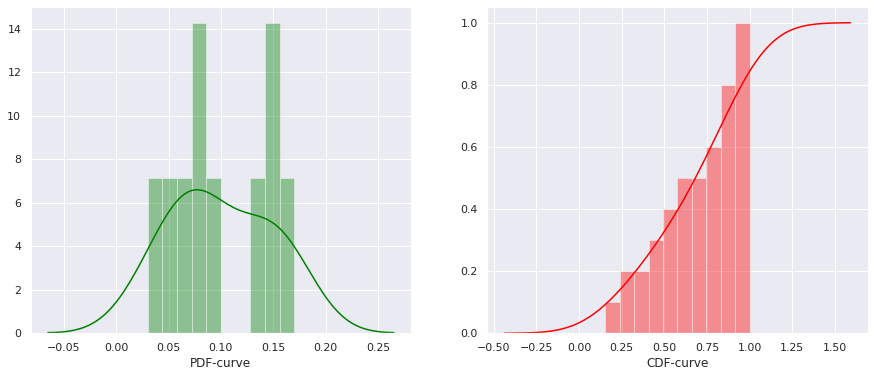

In Annual_Income_in_k$ : 
93.0 % of values lie below  100.39999999999999 Annual_Income_in_k$


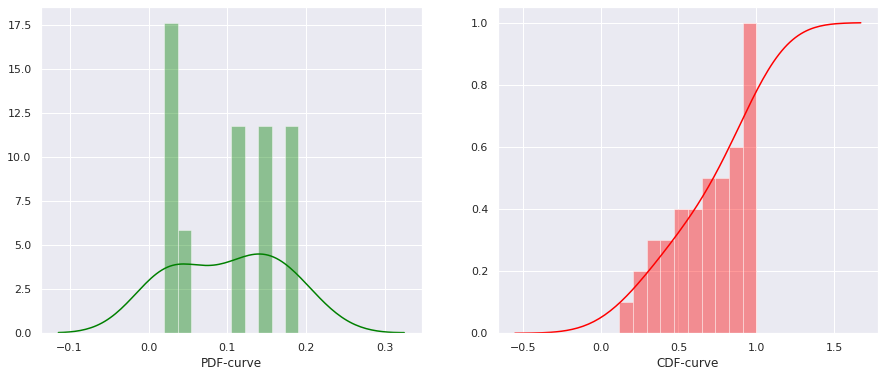

In Spending_score : 
92.0 % of values lie below  89.2 Spending_score


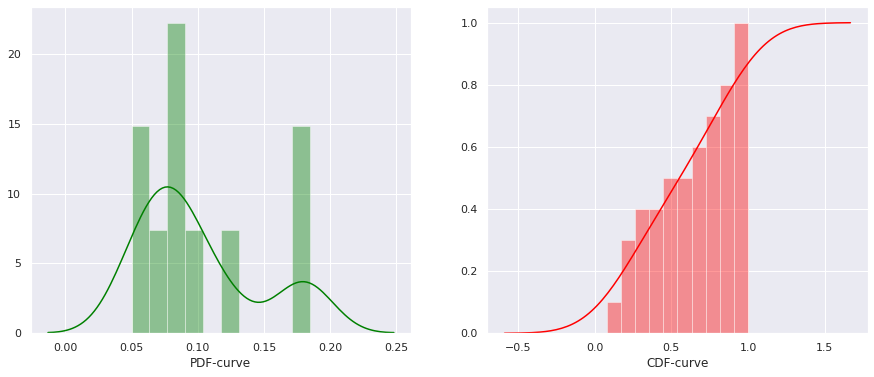

In [ ]:
# plotting of the PDF and CDF curve.
for i in columns:
  plt.subplots(figsize=(15,6))
  plt.grid()
  print("In",i,': ')
  counts, bin_edges = np.histogram(data[i], bins=10, 
                                 density = True)
  pdf = counts/(sum(counts))
  
  cdf = np.cumsum(pdf)
  l = percentage(cdf)
  print(round(cdf[l]*100,2),'% of values lie below ' ,bin_edges[1:][l],
        str(i), end='\n')
  #Plot for the PDF curve
  plt.subplot(1,2,1)

  sns.distplot( pdf, bins= 10, color='green')
  plt.xlabel('PDF-curve')


  #Plot for the CDF curve
  plt.subplot(1,2,2)
  kwargs = {'cumulative': True}
  sns.distplot(cdf,bins= 10, hist_kws=kwargs, kde_kws=kwargs, color='red')
  plt.xlabel('CDF-curve')
  plt.show();
#Note: with respect to the plot what percentage of values lie below what values 
#is mentioned. 
wg.filterwarnings('ignore')

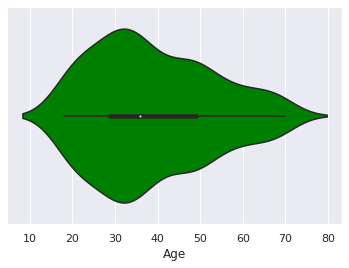

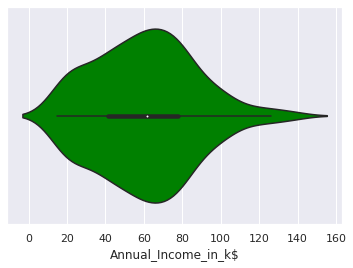

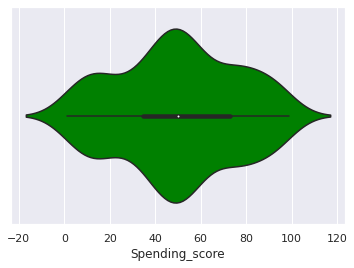

In [ ]:
#Boxplot to identify Outliers in each feature with respect to the diagnosis.
for i in columns:
  sns.violinplot(data = data, x =i, color='green',saturation=2)
  plt.show()

### Observations:
1. None of the PDF distributions of the features follow Gaussian Distribution or Normal Distribution.
2. Outliers are observed only in Annual_Income_in_K$.
3. Inter quartile Ranges of feature as follows:
      > For Age  [28.75, 49.0].

      > For Annual_Income [41.5, 78.0].
      
      > For Spending_Score [34.75, 73.0].


###**Note**
1. The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement. It can be used to estimate summary statistics such as the mean or standard deviation.

2. The confidence interval in which most of customers lie are shown along with the plot.

In [ ]:
#Function to Calculate the Boostrap Confidence interval for the Statistic.

def boostrap_ci(features,data, statistic, sample_size):
    '''
    This function calculates the confidence interval by bootstrapping the data

    Arguments:
        data(DataFrame): Actual data. single column feature. 
        statistic(string): mean, meadian, std(standard_deviation) 
        sample_size(numerical): Size of the sample data generated from the 
            actual data.
    Returns:
        returns 95% of Confidence interval of particular statistic which is
        given as arguments. 
    '''

    for i in features:
        x = data[i]
        a_string ="In " + str(i)+': '
        bolded_string = "\033[1m" + a_string + "\033[0m"
        print(bolded_string)
        # configure bootstrap
        n_iterations = 1000
        n_size = sample_size 
        #stc is the statistic like mean or median or mode or standard deviation
        stc = [] 
        if(statistic == 'median'):
            stc = [np.median(resample(x, n_samples=sample_size))\
                   for i in range(n_iterations)]

        elif(statistic == 'mean'):
            stc = [np.mean(resample(x, n_samples=sample_size)) \
                   for i in range(n_iterations)]
        
        elif(statistic == 'std'):
            stc = [np.std(resample(x, n_samples=sample_size)) \
                   for i in range(n_iterations)]


        # plot scores
        pyplot.hist(stc, color='green',rwidth=0.95)
        pyplot.show()

        # confidence intervals
        alpha = 0.95
        p = ((1.0-alpha)/2.0) * 100
        lower =  np.percentile(stc, p)

        p = (alpha+((1.0-alpha)/2.0)) * 100
        upper =  np.percentile(stc, p)
        
        print('{0}% {1} confidence interval is in range [{2}, {3}]'\
            .format(alpha*100, statistic, lower, upper))
        print('\n\n')



In Age: 


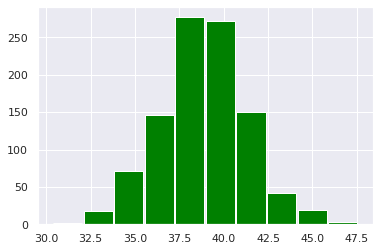

95.0% mean confidence interval is in range [33.96666666666667, 43.93333333333333]



In Annual_Income_in_k$: 


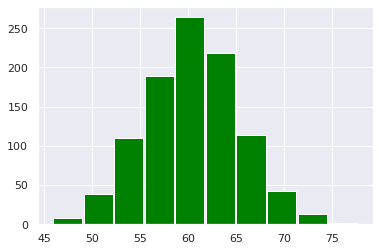

95.0% mean confidence interval is in range [51.399166666666666, 70.1675]



In Spending_score: 


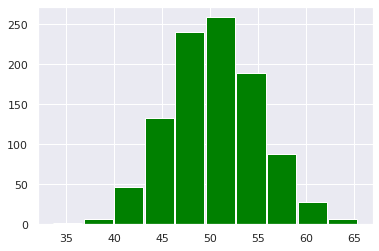

95.0% mean confidence interval is in range [41.5, 59.468333333333334]





In [ ]:
#Boostrap Confidence Interval for Median Statistic
boostrap_ci(columns, data, 'mean', 30)

In Age: 


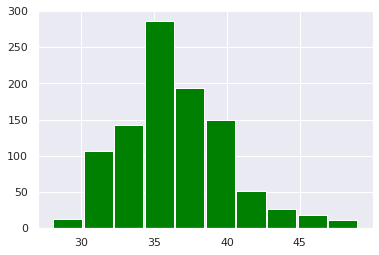

95.0% median confidence interval is in range [31.0, 45.0]



In Annual_Income_in_k$: 


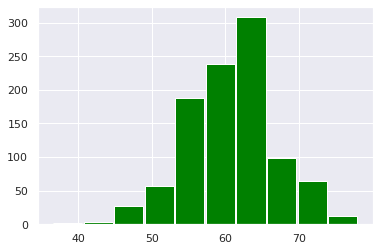

95.0% median confidence interval is in range [48.0, 72.0]



In Spending_score: 


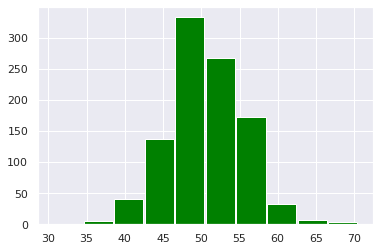

95.0% median confidence interval is in range [42.0, 59.5]





In [ ]:
#Bootstrap Confidence Interval for median.
boostrap_ci(columns, data, 'median', 30)

In Age: 


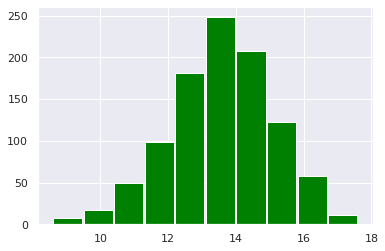

95.0% std confidence interval is in range [10.431967108117808, 16.367667870028598]



In Annual_Income_in_k$: 


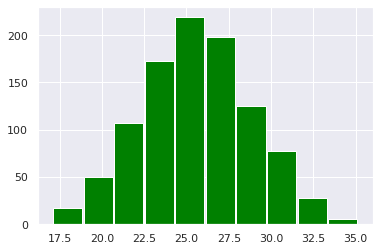

95.0% std confidence interval is in range [19.50507399161146, 32.03199572151317]



In Spending_score: 


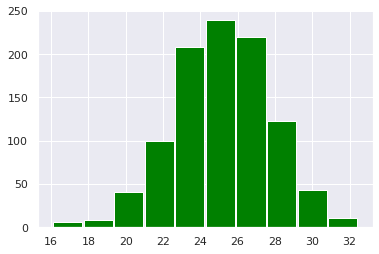

95.0% std confidence interval is in range [19.947024924285, 29.95604886578052]





In [ ]:
#Bootstrap Confidence Interval for standard deviation.
boostrap_ci(columns, data, 'std', 30)
#std --> Standard Deviation.

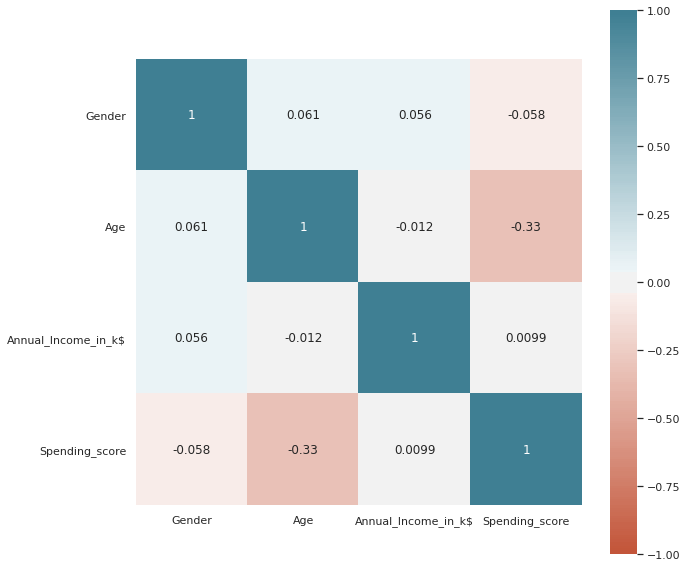

In [ ]:
#Plotting the heatmap of correlation of the features.

plt.subplots(figsize = (10,10))

corr = data.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, 
                 cmap=sns.diverging_palette(20, 220, n=200), square=True, 
                 annot= True)

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
plt.show()

### Observations:
1. There is no much correlation observed in between the features. 
2. Confidence interval for Median statistic is greater when comapred to mean statistic. 


# **Bi-variate Analysis**

<Figure size 2160x1440 with 0 Axes>

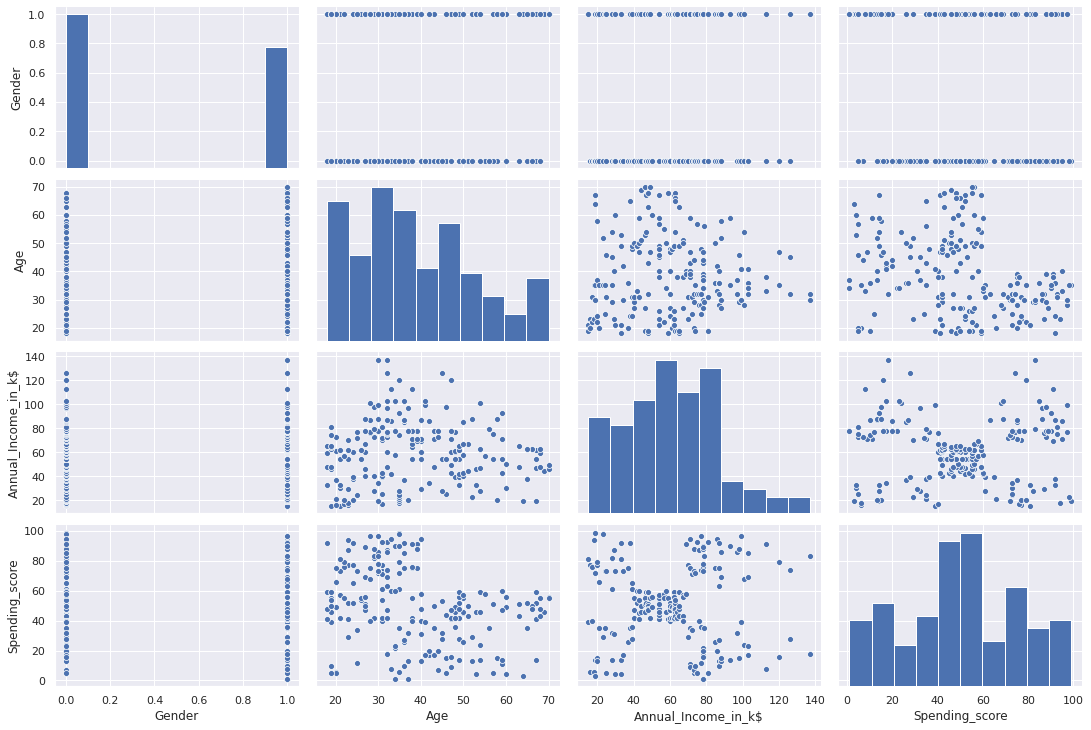

In [ ]:
#pairplot of all the features 
plt.figure(figsize=(30,20))
sns.pairplot(data=data, palette=0.5, aspect=1.5)
plt.show()

### Observations:
1. High chances of formation of clusters are observed between Annual_income_K$ and Spending score. 
2. Scatter plot Between Age and Spending_score shows sparse formation of Clusters. 

3. Scatter plot between Age and Annual_income_K$ shows random scatter plot.  

# **Tri-variate analysis**

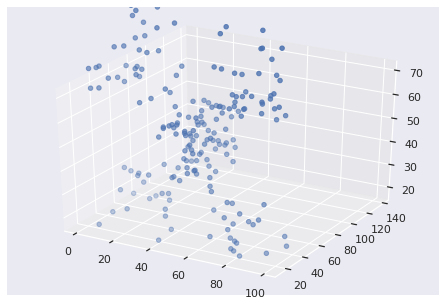

In [ ]:
#plotting of the Age, Spending_score, Annula_income in 3-Dimensional View. 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data['Spending_score'], data['Annual_Income_in_k$'], data['Age'],
           zdir='y')

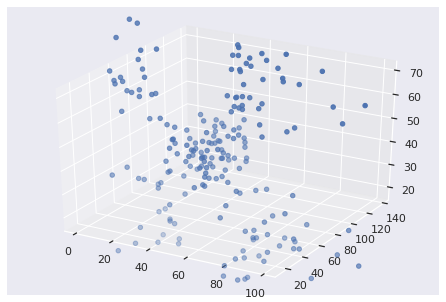

In [ ]:
#plotting of the Age, Spending_score, Annula_income in 3-Dimensional View. 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data['Spending_score'], data['Annual_Income_in_k$'], data['Age'],
           zdir='-y')

###Observations
1.Data seems to be more clustered when Z-axis direction is set to **y** and **-y** mode 

# **Training and Building the model**

In [ ]:
#Extracting data for training phase from Dataframe.

X = np.array(data.iloc[:, [0,1,2,3]])

# **Clustering Algorithms Used:**
1. K-means clustering.
2. K-medoids clustering.
3. Hierarchical clustering.
4. DBSCAN(Density Based Spatial Clustering of Applications with Noise).

# **ELBOW Method**

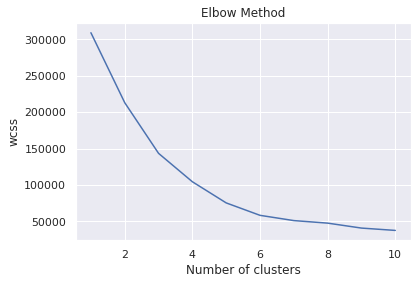

In [ ]:
#Using the elbow method to find the ideal number of clusters

wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10,
              random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

## Note:
 In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5.

# **Sillhoette Method**

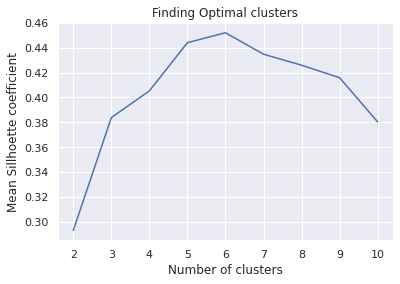

In [ ]:
#Calculating the silhoutte coefficient


clusters = []
sill_coeff = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    clusters.append(n_cluster)
    sill_coeff.append(sil_coeff)
   

plt.plot(clusters, sill_coeff)
plt.title('Finding Optimal clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Sillhoette coefficient')
plt.show()

## Note:
The Highest Silhoutte score is observed when k = 6. 

# **Gap-statistic**

In [ ]:
#Resources : https://gist.github.com/aflaxman/6871948 used to resample using
#Bootstrap
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like data

    Arguments:
        X : array_like data to resample
        n : int, optional
        length of resampled array, equal to len(X) if n==None Results
    
    Returns 
        X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
        
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])
    

    
    return X_resample

def Bootstrap_data(data):
    '''
    Resampling the Data using Bootstrap Method.
    
    Arguments:
         data(Data Frame): the Data frame in which resampling should be done.

    Returns:
        resampled data frame. 

    '''

    #Creating Empty DataFrame having same shape of orginal df having no values in it
    df_resampled = pd.DataFrame(index=data.index, columns=data.columns)

    for col in data.columns:
        df_resampled[col] = bootstrap_resample(data[col])
    
    return df_resampled



In [ ]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther,
     Hastie
    
    Arguments:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    
    Returns: 
    gaps:List of cluster and its gap
    optimalK: The best number for forming the cluster.
    """
    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting 
        #resulting dispersion of each loop
        for i in range(nrefs):
            
            # Resample Data using Bootstrap.
            randomReference = Bootstrap_data(data)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        # Here we are taking the median of nrefs sets of Boostrap Data 
        gap = np.log(np.median(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, 
                                     ignore_index=True)

    return [gaps.argmax() + 1, resultsdf]  
    # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters
    # are optimal




In [ ]:
median_cluster = []
#Here maxCluster argument should be n if you want to form n clusters.
for i in range(4, 17):
    result = optimalK(data,nrefs=5, maxClusters=i)
    median_cluster.append(result[0])
    print('When Max-Clusters:{}, Optimal Cluster:{}, Gap:{}'.format(i, 
                                            result[0],
                                            result[1].loc[result[0]-1, 'gap']))
    
print("\nMedian Optimal Cluster: " + str(np.median(median_cluster)))

When Max-Clusters:4, Optimal Cluster:4, Gap:0.17538045446179318
When Max-Clusters:5, Optimal Cluster:5, Gap:0.32150232898590225
When Max-Clusters:6, Optimal Cluster:6, Gap:0.4465149740303289
When Max-Clusters:7, Optimal Cluster:7, Gap:0.40232645182681637
When Max-Clusters:8, Optimal Cluster:7, Gap:0.488350604439562
When Max-Clusters:9, Optimal Cluster:8, Gap:0.47533577735396726
When Max-Clusters:10, Optimal Cluster:8, Gap:0.4973819514005289
When Max-Clusters:11, Optimal Cluster:8, Gap:0.4973111729632187
When Max-Clusters:12, Optimal Cluster:12, Gap:0.45795531208868745
When Max-Clusters:13, Optimal Cluster:8, Gap:0.5010471268375039
When Max-Clusters:14, Optimal Cluster:8, Gap:0.5126942650385917
When Max-Clusters:15, Optimal Cluster:8, Gap:0.5311559568590454
When Max-Clusters:16, Optimal Cluster:15, Gap:0.5182395774294655

Median Optimal Cluster: 8.0


### Observations:

1. With all three different methodologies to we obtained different optimal cluster number for each. So we calculate the median of all of them and decide that median value as **optimal Cluster value**. 

2. The reason for choosing the median statistic is we all know that clustering is prone to outliers  so in order to not get affected by the outliers we have choosen median statistic 


In [ ]:
#calculating the optimal K value
elbow = 5
sillhouette = 6
gap_statistic = 8
optimal_k_list = [elbow, sillhouette, gap_statistic]
print('Mean Optimal: ',floor(np.mean(optimal_k_list)))
print("Median Optimal: ", np.median(optimal_k_list))

Mean Optimal:  6
Median Optimal:  6.0


Hence We assume the optimal **Cluster k = 6**




# **Plottings after K-means  Labelling Assuming k =6**

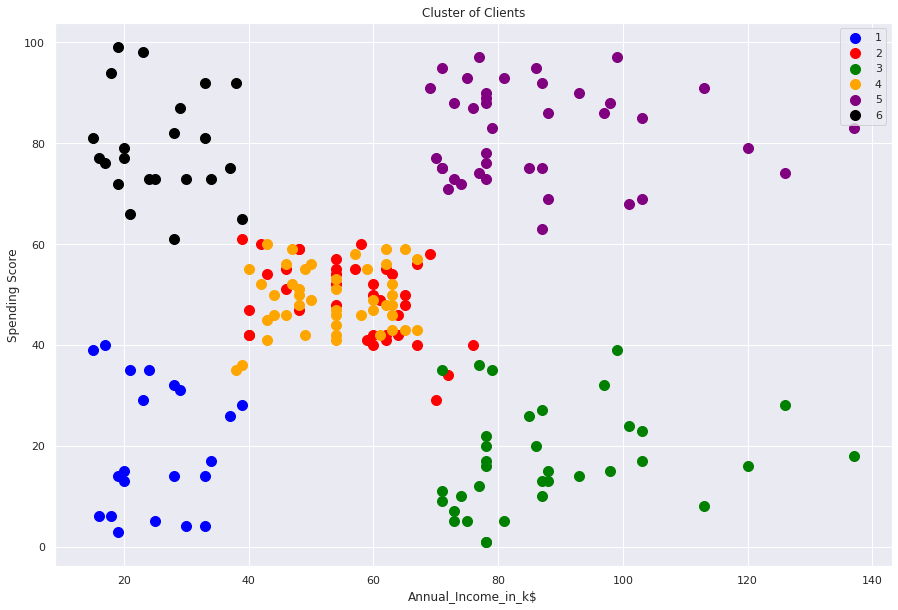

In [ ]:
#k-means with the K = 6 cluster value. 
#Resource:
#https://github.com/abhinavsagar/kaggle-notebooks/blob/master/customer_segmentation.ipynb
df = data
k_means_1 = KMeans(n_clusters=6 )
clusters = k_means_1.fit_predict(X)

df["k_means_1"] = clusters

plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Annual_Income_in_k$'][df.k_means_1 == i], 
                df['Spending_score'][df.k_means_1 == i], s=100,
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('Annual_Income_in_k$')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

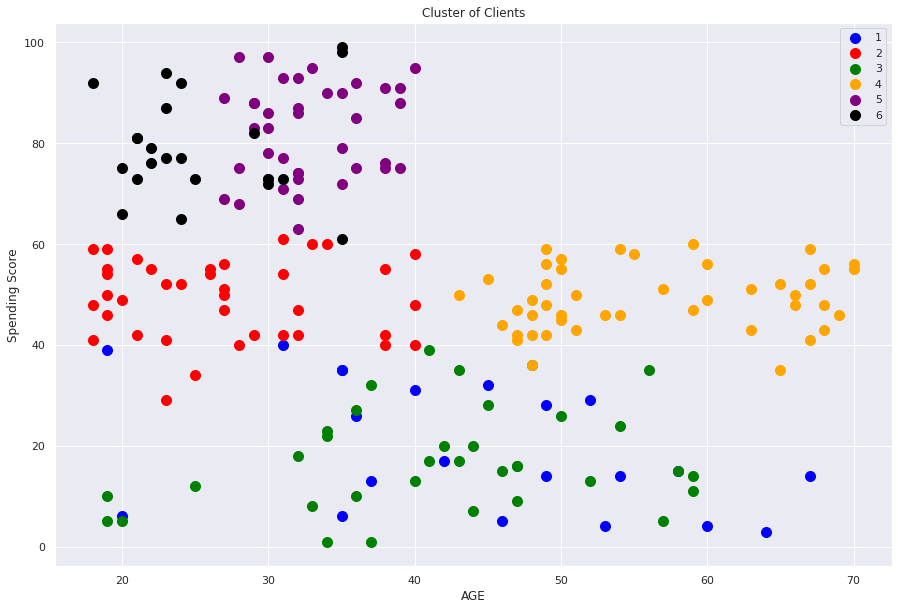

In [ ]:
plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Age'][df.k_means_1 == i], 
                df['Spending_score'][df.k_means_1 == i], s=100,
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('AGE')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

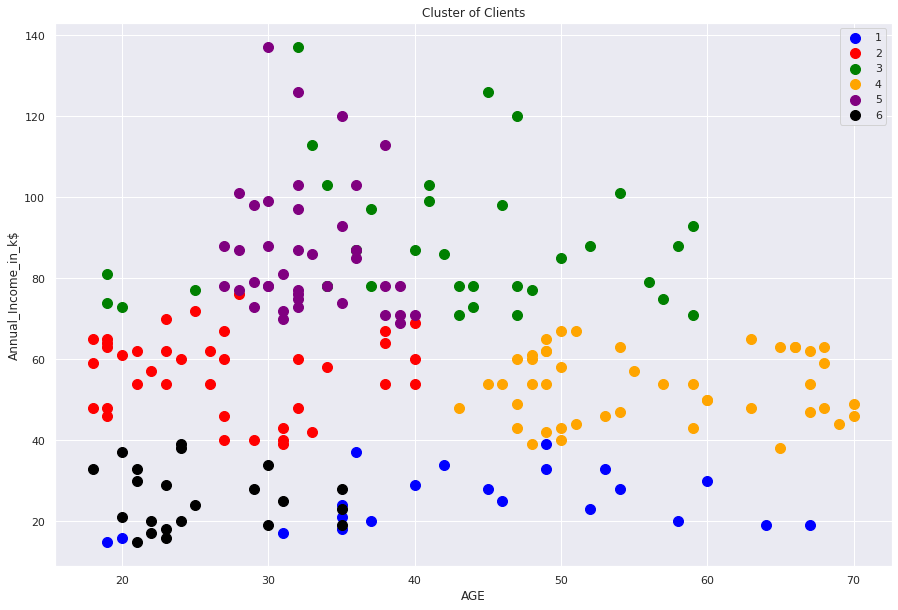

In [ ]:
plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Age'][df.k_means_1 == i], 
                df['Annual_Income_in_k$'][df.k_means_1 == i], s=100,
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('AGE')
plt.ylabel('Annual_Income_in_k$')
plt.legend()
plt.show()

### Observations:
With the above visualization results:
1. We can see Cluster formation clearly with maximum inter-cluster distance and minimum intra-cluster distance when **Spending_score** and **Annual_Income_in_k$** is scatter plotted and here we can reduce our cluster number by one so it gives good cluster formation results.

2. In rest of the two plots there seems to be minimum inter-cluster distance and maximum intra-custer distance.


# **k_mean Labelling when K = 5**

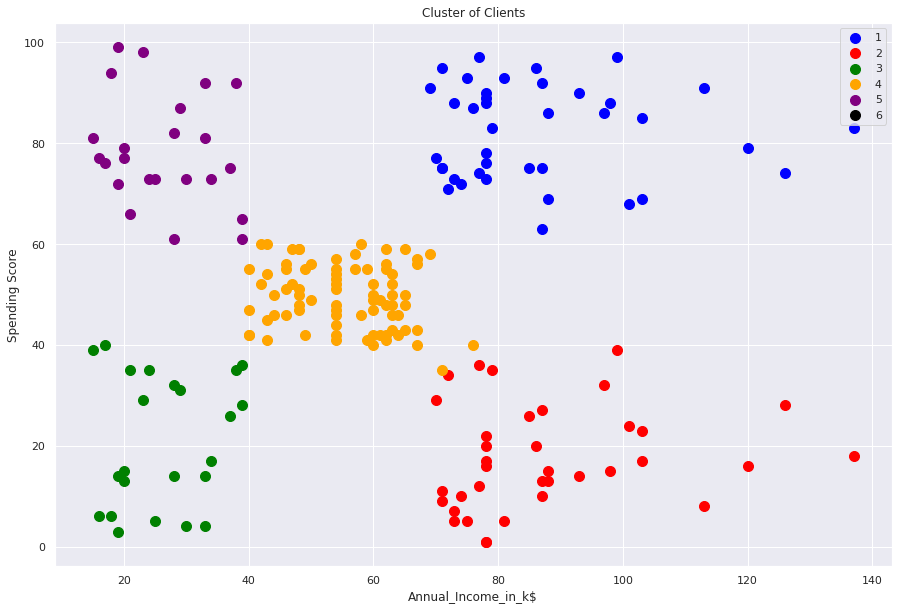

In [ ]:
#kmeans with  K = 5 cluster values.
k_means_2 = KMeans(n_clusters= 5)
clusters = k_means_2.fit_predict(X)

df["k_means_2"] = clusters

plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Annual_Income_in_k$'][df.k_means_2 == i], 
                df['Spending_score'][df.k_means_2 == i], s=100,
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('Annual_Income_in_k$')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

###Observations:
So finally we got the cluster number k = 5 which is said to be having good cluster formation.  

# **K-medoids Clustering**

In [ ]:
#Installing scikit-learn-extra to impliment mediods.
!pip install scikit-learn-extra

# **Elbow Method**

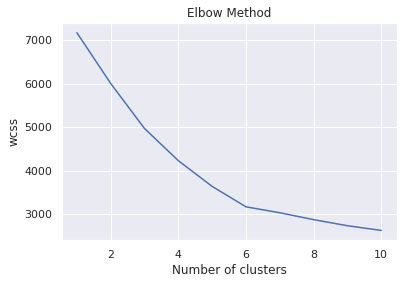

In [ ]:
#applying elbow method for kmedoids to find optimal k value.
wcss = []
for i in range(1,11):
    km=KMedoids(n_clusters=i,init='k-medoids++', max_iter=300, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

# **Sillhouette Method**

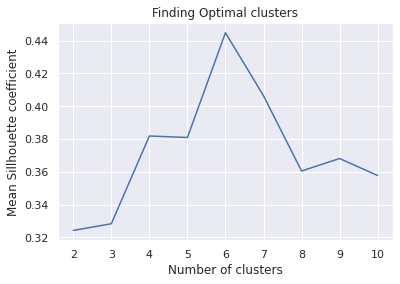

In [ ]:
#Finding the optimal K cluster value using Sillhouette method. 
clusters = []
sill_coeff = []
for n_cluster in range(2, 11):
    km = KMedoids(n_clusters=n_cluster, init='k-medoids++', random_state=0)
    model = km.fit(X)
    
    label = model.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    clusters.append(n_cluster)
    sill_coeff.append(sil_coeff)
   

plt.plot(clusters, sill_coeff)
plt.title('Finding Optimal clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Sillhouette coefficient')
plt.show()

# **Plottings after k-medoids  Labelling**

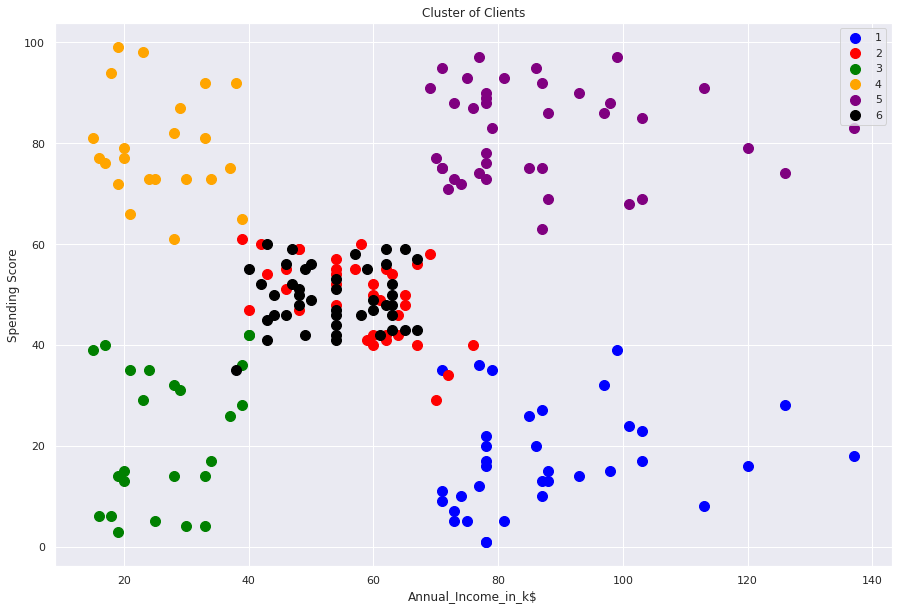

In [ ]:
#Annual_Income_in_k$ and Spending_score.
km = KMedoids(n_clusters= 6, init='k-medoids++', random_state=0)
clusters = km.fit_predict(X)

df["k_medoids"] = clusters

plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Annual_Income_in_k$'][df.k_medoids == i], 
                df['Spending_score'][df.k_medoids == i], s=100,
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('Annual_Income_in_k$')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

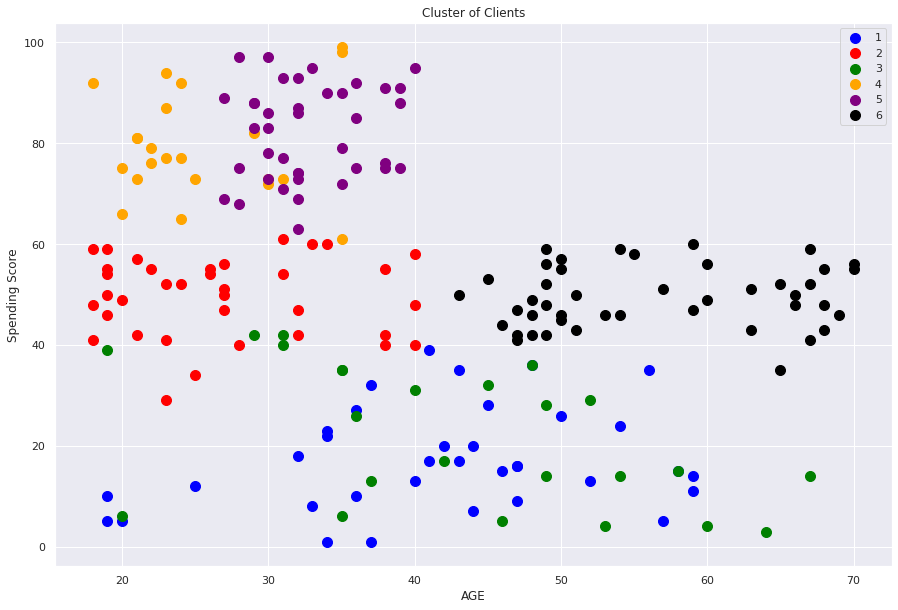

In [ ]:
#Age and spending Score
plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Age'][df.k_medoids == i], 
                df['Spending_score'][df.k_medoids == i], s=100,
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('AGE')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

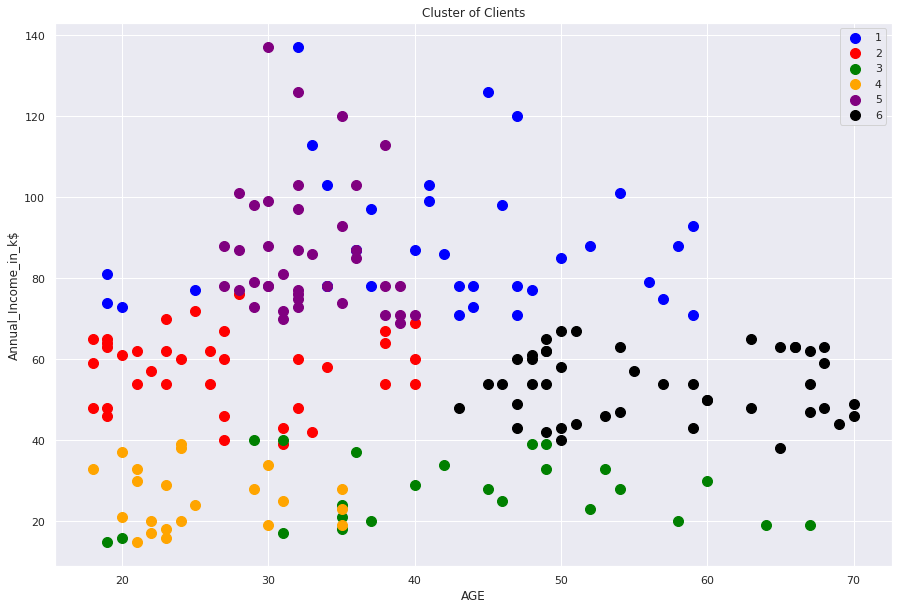

In [ ]:
#Age and Annual_income_in_k$. 
plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Age'][df.k_medoids == i], 
                df['Annual_Income_in_k$'][df.k_medoids == i], s=100,
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('AGE')
plt.ylabel('Annual_Income_in_k$')
plt.legend()
plt.show()
wg.filterwarnings('ignore')

# **Hierarchical Clustering:**

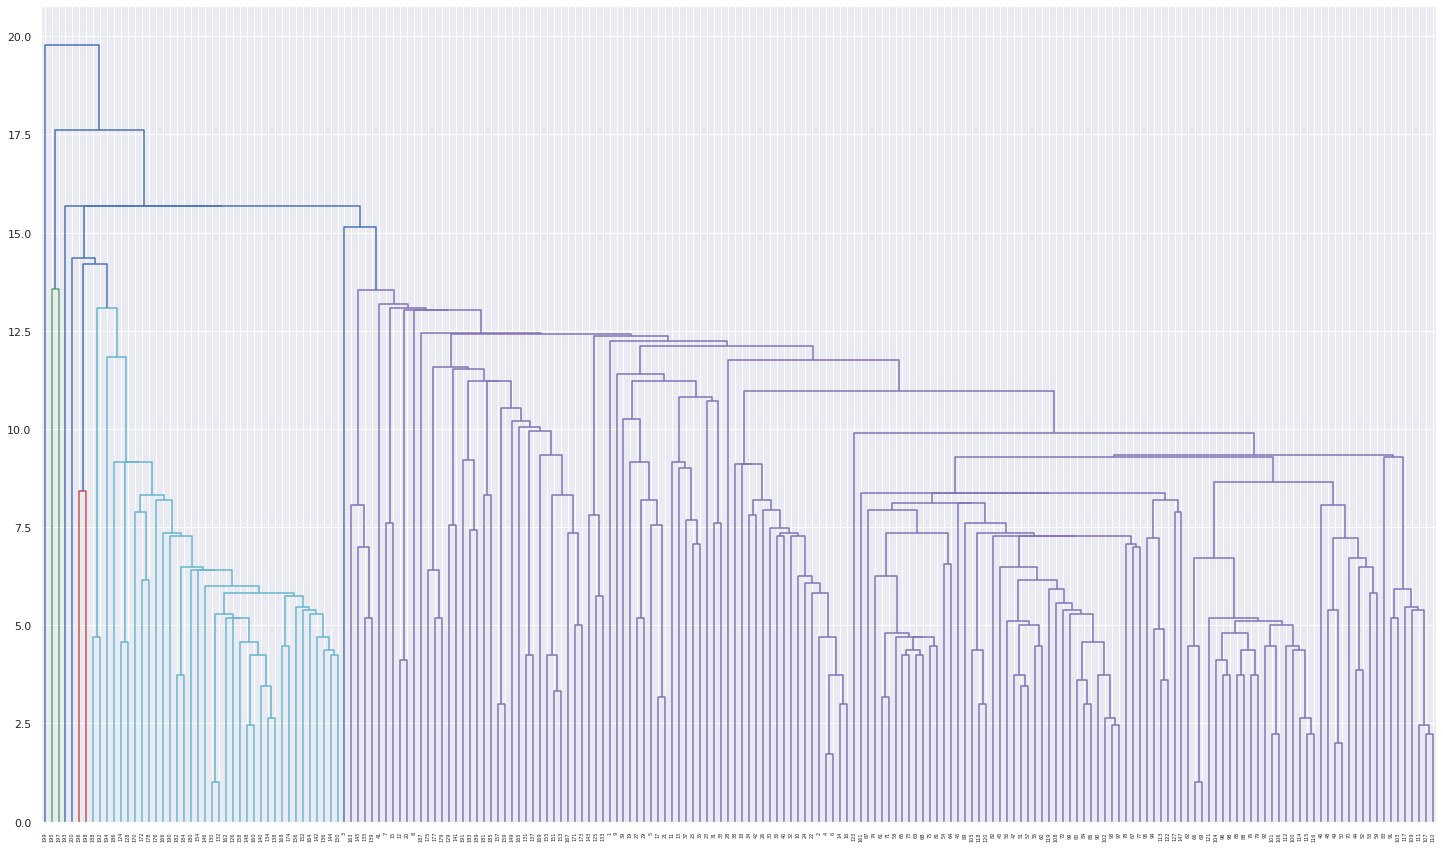

In [ ]:
#dendogram Chart for optimal K value.
linked = linkage(X, 'single')

labelList = range(1, 201)

plt.figure(figsize=(25, 15))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### Observation:
1. if we  carefully observe there are five different color sets of clusters are formed in the above image they are:

    a. Green.
    b. Red.
    c. Dark green.
    d. Blue.
    e. Brinjal.

In [ ]:
#Aggolomerative clustering implimnetation with K = 5.
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_+1)


[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 1 5 4 5 4 5 4 5 4 5
 4 5 4 5 4 5 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


# **Plottings after Hierarchy  Labelling**

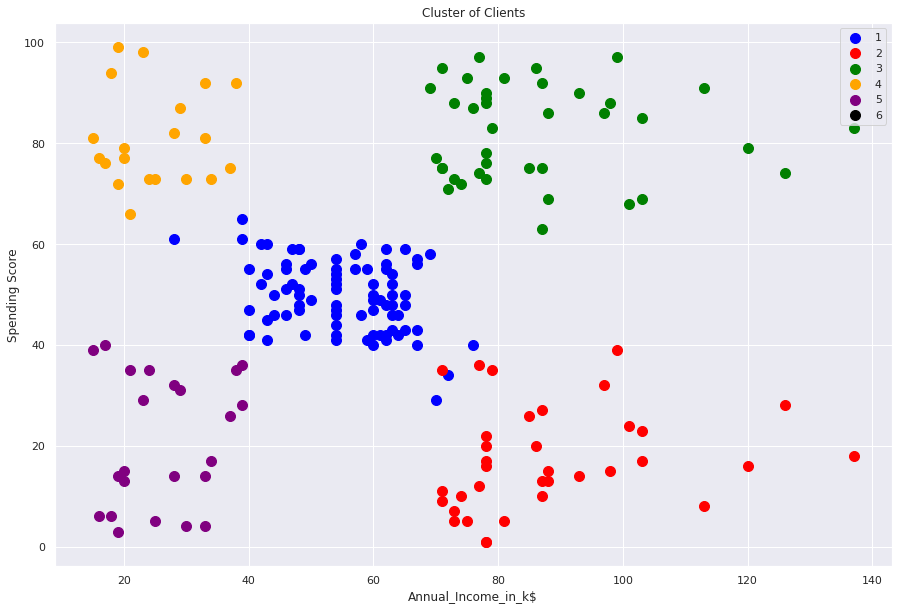

In [ ]:
#Annual_Income_in_k$ and Spending_score.


cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

df["hierarchy"] = cluster.labels_

plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Annual_Income_in_k$'][df.hierarchy == i], 
                df['Spending_score'][df.hierarchy == i], s=100, 
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('Annual_Income_in_k$')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

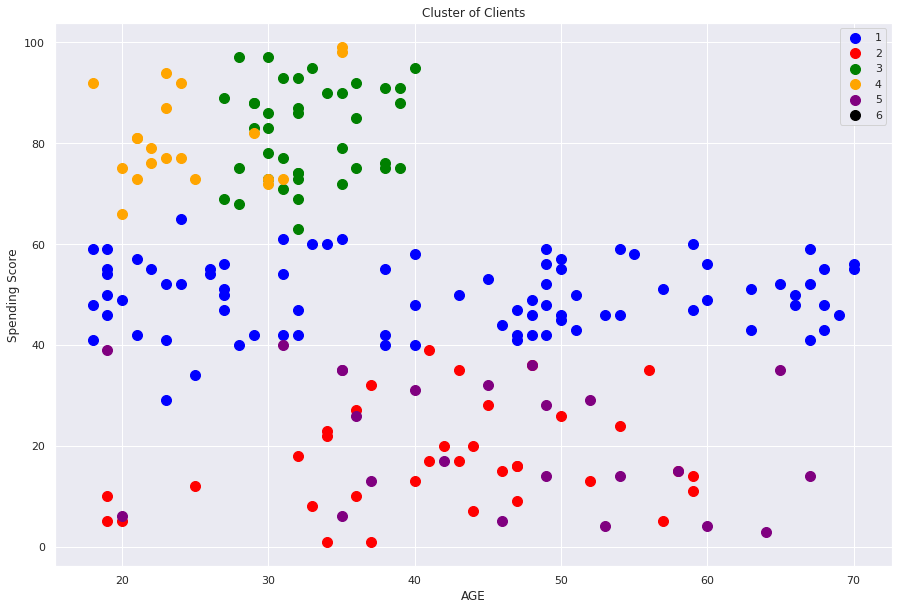

In [ ]:
#Age and spending Score
plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Age'][df.hierarchy == i], 
                df['Spending_score'][df.hierarchy == i], s=100, 
                c=colors[i], label= i+1)

plt.title('Cluster of Clients')
plt.xlabel('AGE')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

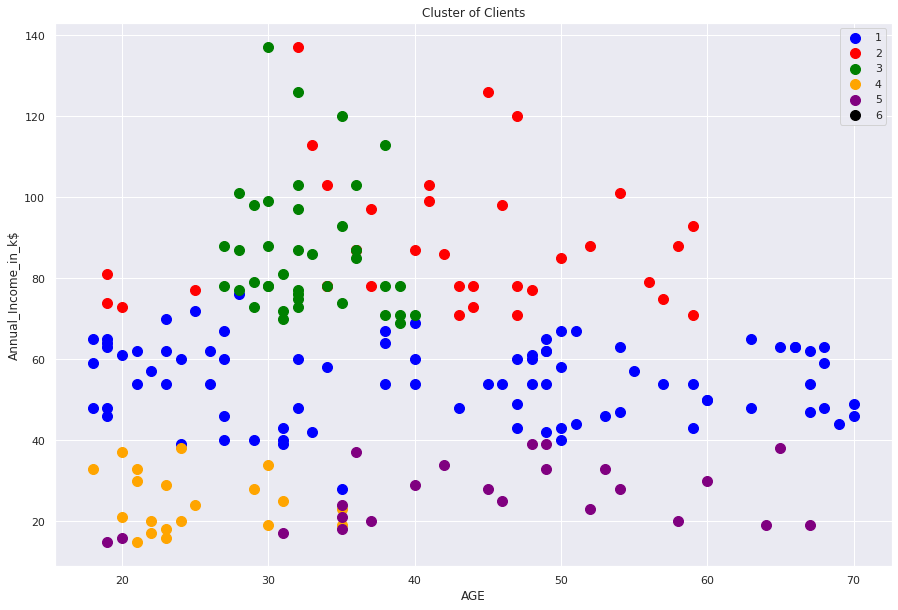

In [ ]:
#Age and Annual_income_in_k$. 
plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(6):
    plt.scatter(df['Age'][df.hierarchy == i], 
                df['Annual_Income_in_k$'][df.hierarchy == i], s=100, 
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('AGE')
plt.ylabel('Annual_Income_in_k$')
plt.legend()
plt.show()
wg.filterwarnings('ignore')

# **Density based spatial clustering of application with noise**(DBSCAN)

In [ ]:
# DBSCAN implimentation.

dbscan = DBSCAN(eps = 3.5, min_samples = 2)
 
# Fitting the model
model = dbscan.fit(X)
labels = model.labels_

#identifying the points which makes up our core points
sample_cores = np.zeros_like(labels, dtype = bool)
sample_cores[dbscan.core_sample_indices_] = True

#Calculating the number of clusters
n_clusters = len(set(labels))- (1 if -1 in labels else 0)
print("Number of Clusters formed: ",n_clusters)


Number of Clusters formed:  18


In [ ]:
#printing the Class labels and their count. 
label_count = {}
label_count['k_means']   = df['k_means_2'].value_counts()
label_count['k_medoids'] = df['k_medoids'].value_counts()
label_count['hierarchy'] = df['hierarchy'].value_counts()
data = pd.DataFrame(label_count)
data

,k_means,k_medoids,hierarchy
0,39.0,35,83.0
1,36.0,36,35.0
2,23.0,24,39.0
3,79.0,22,20.0
4,23.0,39,23.0
5,NaN,44,NaN


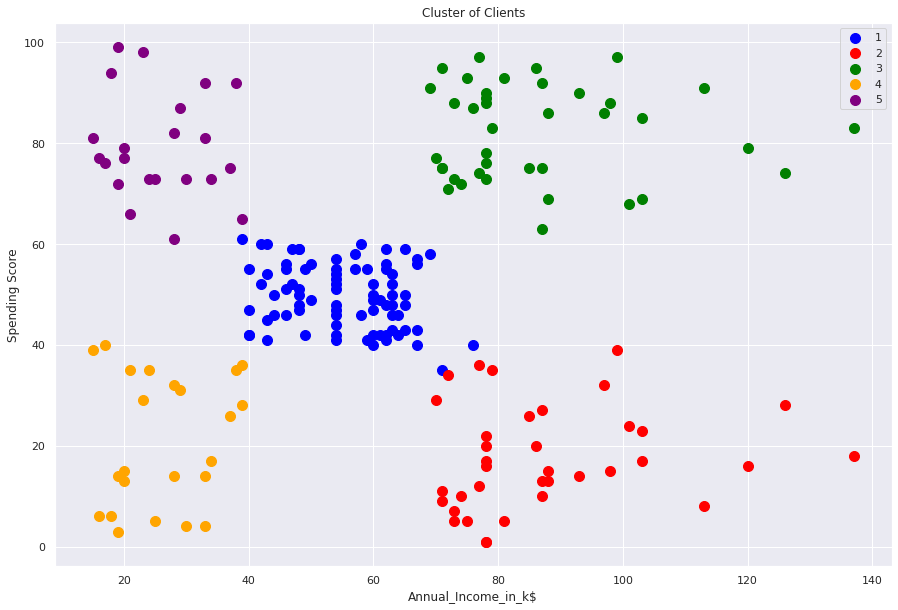

In [ ]:
#kmeans with  K = 5 cluster values.
k_means_2 = KMeans(n_clusters= 5)
clusters = k_means_2.fit_predict(X)

df["k_means_2"] = clusters

plt.figure(figsize=(15,10))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(5):
    plt.scatter(df['Annual_Income_in_k$'][df.k_means_2 == i], 
                df['Spending_score'][df.k_means_2 == i], s=100,
                c=colors[i], label=i+1)

plt.title('Cluster of Clients')
plt.xlabel('Annual_Income_in_k$')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### **Observations:**
1. DBSCAN works well for high density data but our data has low density for which the model is showing highest number of clusters.

2. Hence for our data K-means and k-medoids and hierarchical clustering are best models. 


# **Final Observations:**
1. Among all the features Spending score and Annual_Income_in_k$ play key role in clustering.

2. 95% of our customers lies in between the Age[31, 45]

3. Female customers are 12% more than male customers.

4. K-means and hierarchical clustering performed good and approximately equal. 

# **Observations after Classifications of Customers using K-means.**
Cluster 1 – This cluster denotes the customer_data with low annual income as well as low yearly spend of income.

Cluster 2 – This cluster denotes a high annual income and low yearly spend.

Cluster 3 – These clusters represent the customer_data with the medium income salary as well as the medium annual spend of salary.

Cluster 4 – This cluster represents the customer_data having a high annual income as well as a high annual spend.


Cluster 5 – This cluster represents a low annual income but its high yearly expenditure.



# **Clustering Using K-means.:**

In [ ]:

# Saving model to disk
pickle.dump(k_means_2, open('model_kmeans.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model_kmeans.pkl','rb'))
print(model.predict([[1,20,17, 30]]))

[3]
